# Signals and Systems (Oppenheim), Chapter 6

In [76]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting, discrete_time, tonegen
# import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)
reload(discrete_time)
reload(tonegen)

# %matplotlib ipympl
%matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


## First-order system

In [77]:
tau = 1

# Coefficients
b = [1]
a = [tau, 1]

# Time-domain responses
t = np.linspace(0, 5*tau, 1000)
x = np.zeros_like(t, dtype=t.dtype)
x[0] = 2/(t[1]-t[0])
_, ht, _ = signal.lsim((b, a), x, t)
x = np.ones_like(t, dtype=t.dtype)
_, st, _ = signal.lsim((b, a), x, t)

# Frequency response
w, h = signal.freqs(b, a)

In [ ]:
fig, ax = plotting.plot_ct_sig(np.vstack((t, t)), np.vstack((ht, st)), 
                               labels=["Impulse Response", "Step Response"], 
                               title=f"First-Order System, tau={tau}")

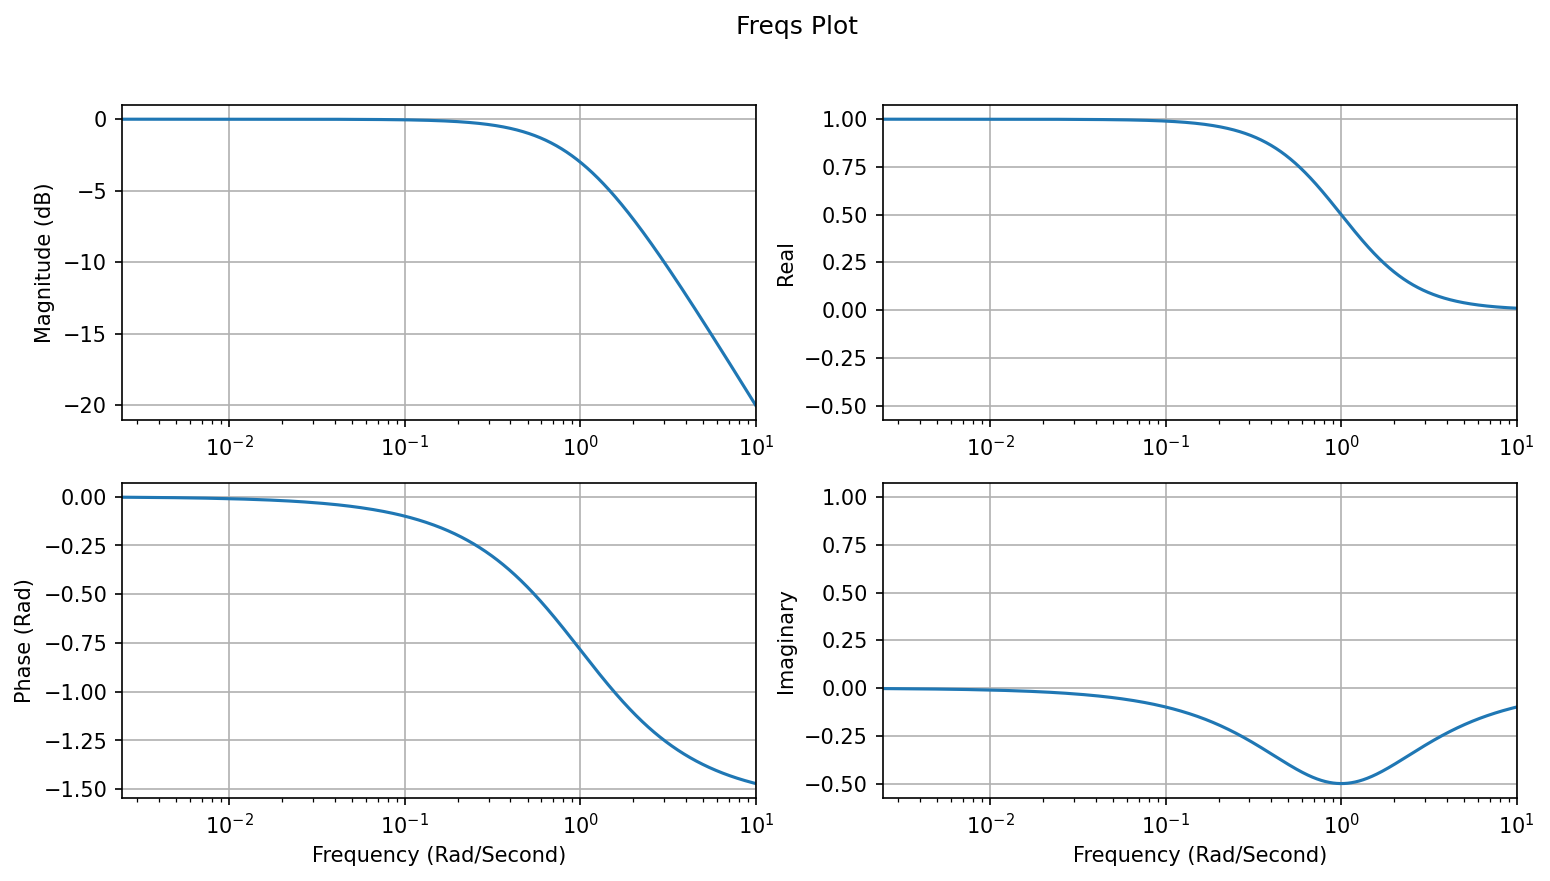

In [ ]:
fig, axs = plotting.plot_freqs(b, a, worN=np.linspace(0, tau*10, 4096)[1:], angular_freq=True, title=f"Freq Response of First-Order System, tau={tau}")